In [48]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os

import dotenv

dotenv.load_dotenv()

import pprint
from pprint import pp 
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')

import seaborn as sns

from src.tradecli import *
from src.utils import *
from src.journal import *
import src.journal as jr

from src.analysis import *
import analysis

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
logging.getLogger().setLevel(logging.WARNING)

/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts:/Users/tobiaspucher/.lmstudio/bin
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'COMMAND_MODE': 'unix2003',
 'CONDA_DEFAULT_ENV': 'base',
 'CONDA_EXE': '/Users/tobiaspucher/miniconda3/bin/conda',
 'CONDA_PREFIX': '/

In [39]:
# grab just last row
df = jr.get_full_df()

display(df.tail(4))

display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])


,trade_uid,session,tp_price,poi,poi_1h_mitigation,SL_distance,return,management_strategy,potential_price,entry_time,poi_1h_sc,type_1_m5,potential_risk_reward,poi_15m_liquidity_grab,numerical_confidence,entry_price,poi_15m_sc,type_1_m15,type_3_m1,poi_1m_liquidity_grab,poi_1m_sc,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,poi_15m_mitigation,sl_price,potential_return,side,close_price,poi_1h_liquidity_grab,account,poi_1m_mitigation,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2,new_york,3000.00,None,<NA>,3.09,NaN,no_management,NaN,2025-02-18 14:10:00,<NA>,<NA>,NaN,<NA>,NaN,2914.03,<NA>,<NA>,<NA>,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,<NA>,2910.94,NaN,long,NaN,<NA>,mt5_vantage,<NA>,True,True,False,False,False,True
1,4,new_york,22105.27,"(poi_1h_liquidity_grab, poi_1h_sc, poi_1m_sc)",False,-14.69,-59.13,be_after_push,21600.0,2025-02-22 15:11:00,True,True,38.420694,False,5.0,22164.40,False,True,True,False,True,<NA>,4.025187,True,-59.13,4.025187,-59.13,False,22179.09,-564.4,short,22105.27,True,ideal,False,True,False,True,True,True,False
2,5,NaN,NaN,None,<NA>,NaN,NaN,no_management,NaN,NaT,<NA>,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,None,<NA>,False,False,False,False,False,True


,tp_price,SL_distance,return,potential_price,entry_time,potential_risk_reward,numerical_confidence,entry_price,rr,initial_return,initial_risk_reward,TP_distance,sl_price,potential_return,close_price
count,2.000000,2.000000,1.00,1.0,2,1.000000,1.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.00
mean,12552.635000,-5.800000,-59.13,21600.0,2025-02-20 14:40:30,38.420694,5.0,12539.215000,4.025187,13.420000,15.923597,13.420000,12545.015000,-564.4,22105.27
min,3000.000000,-14.690000,-59.13,21600.0,2025-02-18 14:10:00,38.420694,5.0,2914.030000,4.025187,-59.130000,4.025187,-59.130000,2910.940000,-564.4,22105.27
25%,7776.317500,-10.245000,-59.13,21600.0,2025-02-19 14:25:15,38.420694,5.0,7726.622500,4.025187,-22.855000,9.974392,-22.855000,7727.977500,-564.4,22105.27
50%,12552.635000,-5.800000,-59.13,21600.0,2025-02-20 14:40:30,38.420694,5.0,12539.215000,4.025187,13.420000,15.923597,13.420000,12545.015000,-564.4,22105.27
75%,17328.952500,-1.355000,-59.13,21600.0,2025-02-21 14:55:45,38.420694,5.0,17351.807500,4.025187,49.695000,21.872802,49.695000,17362.052500,-564.4,22105.27
max,22105.270000,3.090000,-59.13,21600.0,2025-02-22 15:11:00,38.420694,5.0,22164.400000,4.025187,85.970000,27.822006,85.970000,22179.090000,-564.4,22105.27
std,13509.465973,12.572359,NaN,NaN,NaN,NaN,NaN,13612.067167,NaN,102.601194,16.826892,102.601194,13624.639526,NaN,NaN


Index(['trade_uid', 'session', 'tp_price', 'poi', 'poi_1h_mitigation',
       'SL_distance', 'return', 'management_strategy', 'potential_price',
       'entry_time', 'poi_1h_sc', 'type_1_m5', 'potential_risk_reward',
       'poi_15m_liquidity_grab', 'numerical_confidence', 'entry_price',
       'poi_15m_sc', 'type_1_m15', 'type_3_m1', 'poi_1m_liquidity_grab',
       'poi_1m_sc', 'taken', 'rr', 'htf_poi_ltf_confirmation',
       'initial_return', 'initial_risk_reward', 'TP_distance',
       'poi_15m_mitigation', 'sl_price', 'potential_return', 'side',
       'close_price', 'poi_1h_liquidity_grab', 'account', 'poi_1m_mitigation',
       'session_new_york', 'side_long', 'side_short',
       'htf_poi_ltf_confirmation_True', 'management_strategy_be_after_push',
       'management_strategy_no_management'],
      dtype='object')
trade_uid                                    object
session                                    category
tp_price                                    float64
poi       

In [40]:
from analysis import *
import analysis
import journal
import strategy
import features as f


df = jr.j.to_dataframe().copy()
display(df.tail())

strategy.sanity_checks(df, j)

def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points'})
    df = df[(df['account'] != ACC_TEST) & (True)]
    
    return df

df = prepare_data(df)
strategy.sanity_checks(df, j)
 
type_X_cols = f.PA.used_tags_in_df_not_null(df)

print(type_X_cols)



,trade_uid,session,tp_price,poi,poi_1h_mitigation,SL_distance,return,management_strategy,potential_price,entry_time,poi_1h_sc,type_1_m5,potential_risk_reward,poi_15m_liquidity_grab,numerical_confidence,entry_price,poi_15m_sc,type_1_m15,type_3_m1,poi_1m_liquidity_grab,poi_1m_sc,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,poi_15m_mitigation,sl_price,potential_return,side,close_price,poi_1h_liquidity_grab,account,poi_1m_mitigation,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2,new_york,3000.00,None,<NA>,3.09,NaN,no_management,NaN,2025-02-18 14:10:00,<NA>,<NA>,NaN,<NA>,NaN,2914.03,<NA>,<NA>,<NA>,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,<NA>,2910.94,NaN,long,NaN,<NA>,mt5_vantage,<NA>,True,True,False,False,False,True
1,4,new_york,22105.27,"(poi_1h_liquidity_grab, poi_1h_sc, poi_1m_sc)",False,-14.69,-59.13,be_after_push,21600.0,2025-02-22 15:11:00,True,True,38.420694,False,5.0,22164.40,False,True,True,False,True,<NA>,4.025187,True,-59.13,4.025187,-59.13,False,22179.09,-564.4,short,22105.27,True,ideal,False,True,False,True,True,True,False
2,5,NaN,NaN,None,<NA>,NaN,NaN,no_management,NaN,NaT,<NA>,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,None,<NA>,False,False,False,False,False,True


['type_1_m5', 'type_1_m15', 'type_3_m1']


In [41]:
f.POI.sanity_check(df)

POI Sanity Check:


,Column,Valid Count,Total Count,Valid Ratio
0,poi_1h_mitigation,1,3,0.333333
1,poi_1h_sc,1,3,0.333333
2,poi_15m_liquidity_grab,1,3,0.333333
3,poi_15m_sc,1,3,0.333333
4,poi_1m_liquidity_grab,1,3,0.333333
5,poi_1m_sc,1,3,0.333333
6,poi_15m_mitigation,1,3,0.333333
7,poi_1h_liquidity_grab,1,3,0.333333
8,poi_1m_mitigation,1,3,0.333333


In [42]:
f.POI.summary(df)

Summary of POIs:
Used POIs: poi_15m_mitigation, poi_15m_sc, poi_1m_liquidity_grab, poi_1m_sc, poi_1h_sc, poi_1h_mitigation, poi_15m_liquidity_grab, poi_1h_liquidity_grab, poi_1m_mitigation
Not Used POIs: All POIs are used


In [49]:

display(df['entry_time'])

calculate_performance_metrics(df)

0   2025-02-18 14:10:00
1   2025-02-22 15:11:00
2                   NaT
Name: entry_time, dtype: datetime64[ns]

Total Trades                  3.000000
Total Return                -59.130000
Average Return              -59.130000
Max Return Drawdown           0.000000
Total Risk Reward Ratio       4.025187
Average Risk Reward Ratio     4.025187
Max Risk Reward Ratio         4.025187
Min Risk Reward Ratio         4.025187
dtype: float64

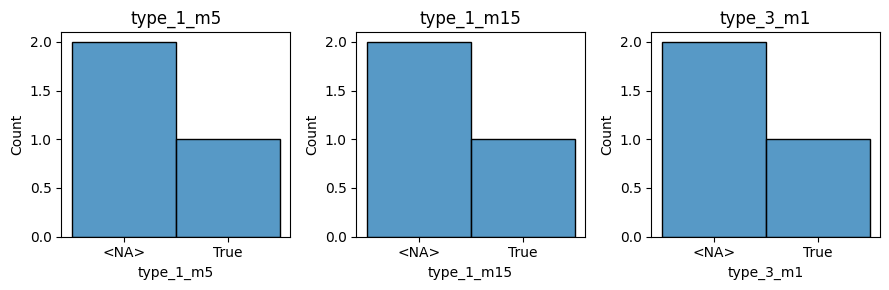

In [50]:
plot_feature_distributions(df, type_X_cols,)

In [51]:
df

,trade_uid,session,tp_price,poi,poi_1h_mitigation,SL_distance,return_points,management_strategy,potential_price,entry_time,poi_1h_sc,type_1_m5,potential_risk_reward,poi_15m_liquidity_grab,numerical_confidence,entry_price,poi_15m_sc,type_1_m15,type_3_m1,poi_1m_liquidity_grab,poi_1m_sc,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,poi_15m_mitigation,sl_price,potential_return,side,close_price,poi_1h_liquidity_grab,account,poi_1m_mitigation,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2,new_york,3000.00,None,<NA>,3.09,NaN,no_management,NaN,2025-02-18 14:10:00,<NA>,<NA>,NaN,<NA>,NaN,2914.03,<NA>,<NA>,<NA>,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,<NA>,2910.94,NaN,long,NaN,<NA>,mt5_vantage,<NA>,True,True,False,False,False,True
1,4,new_york,22105.27,"(poi_1h_liquidity_grab, poi_1h_sc, poi_1m_sc)",False,-14.69,-59.13,be_after_push,21600.0,2025-02-22 15:11:00,True,True,38.420694,False,5.0,22164.40,False,True,True,False,True,<NA>,4.025187,True,-59.13,4.025187,-59.13,False,22179.09,-564.4,short,22105.27,True,ideal,False,True,False,True,True,True,False
2,5,NaN,NaN,None,<NA>,NaN,NaN,no_management,NaN,NaT,<NA>,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,None,<NA>,False,False,False,False,False,True


In [62]:
import pandas as pd
from typing import List, Type, Union

def reorder_dataframe_columns(
    df: pd.DataFrame, 
    fixed_features: List[str], 
    feature_classes: List[Union[str, Type[BaseFeature]]]
) -> pd.DataFrame:
    """
    Reorder DataFrame columns based on a predefined order of fixed features and feature classes.

    Parameters:
    - df: The DataFrame to reorder.
    - fixed_features: A list of column names that should appear first in the specified order.
    - feature_classes: A list of classes or strings whose ALL_TAGS() will be used to determine the order of columns.

    Returns:
    - A new DataFrame with columns reordered.
    """
    # Initialize an empty list to hold the ordered columns
    ordered_columns = []

    # Add fixed features first, ensuring they are unique
    for feature in fixed_features:
        if feature in df.columns and feature not in ordered_columns:
            ordered_columns.append(feature)

    # Add columns from each class in the specified order
    for item in feature_classes:
        if isinstance(item, str):
            # If it's a string, just add it if it exists in the DataFrame
            if item in df.columns and item not in ordered_columns:
                ordered_columns.append(item)
        elif issubclass(item, BaseFeature):
            # If it's a class, add all its tags
            for tag in item.ALL_TAGS():
                if tag in df.columns and tag not in ordered_columns:
                    ordered_columns.append(tag)

    # Get the remaining columns that are not in the ordered list
    remaining_columns = [col for col in df.columns if col not in ordered_columns]

    # Combine the ordered columns with the remaining columns
    final_order = ordered_columns + remaining_columns

    # Reorder the DataFrame
    return df[final_order]

# Example usage
# Assuming df is your DataFrame and you want to prioritize 'entry_time' first
fixed_columns = ['entry_time', 'trade_uid']  # Columns to fixate at the beginning
class_order = [POI, RiskManagement, Outcome]  # Define the order of classes

df_sorted = reorder_dataframe_columns(df, fixed_columns, class_order)
display(df)
# Display the sorted DataFrame
display(df_sorted)

assert len(df.columns) == len(df_sorted.columns)


,trade_uid,session,tp_price,poi,poi_1h_mitigation,SL_distance,return_points,management_strategy,potential_price,entry_time,poi_1h_sc,type_1_m5,potential_risk_reward,poi_15m_liquidity_grab,numerical_confidence,entry_price,poi_15m_sc,type_1_m15,type_3_m1,poi_1m_liquidity_grab,poi_1m_sc,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,poi_15m_mitigation,sl_price,potential_return,side,close_price,poi_1h_liquidity_grab,account,poi_1m_mitigation,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2,new_york,3000.00,None,<NA>,3.09,NaN,no_management,NaN,2025-02-18 14:10:00,<NA>,<NA>,NaN,<NA>,NaN,2914.03,<NA>,<NA>,<NA>,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,<NA>,2910.94,NaN,long,NaN,<NA>,mt5_vantage,<NA>,True,True,False,False,False,True
1,4,new_york,22105.27,"(poi_1h_liquidity_grab, poi_1h_sc, poi_1m_sc)",False,-14.69,-59.13,be_after_push,21600.0,2025-02-22 15:11:00,True,True,38.420694,False,5.0,22164.40,False,True,True,False,True,<NA>,4.025187,True,-59.13,4.025187,-59.13,False,22179.09,-564.4,short,22105.27,True,ideal,False,True,False,True,True,True,False
2,5,NaN,NaN,None,<NA>,NaN,NaN,no_management,NaN,NaT,<NA>,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,None,<NA>,False,False,False,False,False,True


,entry_time,trade_uid,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,session,tp_price,poi,SL_distance,return_points,management_strategy,potential_price,type_1_m5,potential_risk_reward,numerical_confidence,entry_price,type_1_m15,type_3_m1,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,sl_price,potential_return,side,close_price,account,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2025-02-18 14:10:00,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,new_york,3000.00,None,3.09,NaN,no_management,NaN,<NA>,NaN,NaN,2914.03,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,2910.94,NaN,long,NaN,mt5_vantage,True,True,False,False,False,True
1,2025-02-22 15:11:00,4,True,True,False,False,False,False,True,False,False,new_york,22105.27,"(poi_1h_liquidity_grab, poi_1h_sc, poi_1m_sc)",-14.69,-59.13,be_after_push,21600.0,True,38.420694,5.0,22164.40,True,True,<NA>,4.025187,True,-59.13,4.025187,-59.13,22179.09,-564.4,short,22105.27,ideal,True,False,True,True,True,False
2,NaT,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,None,NaN,NaN,no_management,NaN,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,False,False,False,False,False,True


In [59]:
from src.analysis import *
from src.features import *

#logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger().setLevel(logging.WARNING)

def summarize_trade(trade: jr.Trade, df: pd.DataFrame):    
    df = df[df['trade_uid'] == trade.uid]
    if len(df) == 0:
        logging.warning(f"Trade {trade.uid} not found in df")
    display(df)
    display(trade)
    
    pp(trade.get_tags_dict())
    
    features = used_feature_classes(df)
    
    print(f"Features: {features}")
    pp(features)
    
    
summarize_trade(jr.j.trades[0], df)


,trade_uid,session,tp_price,poi,poi_1h_mitigation,SL_distance,return_points,management_strategy,potential_price,entry_time,poi_1h_sc,type_1_m5,potential_risk_reward,poi_15m_liquidity_grab,numerical_confidence,entry_price,poi_15m_sc,type_1_m15,type_3_m1,poi_1m_liquidity_grab,poi_1m_sc,taken,rr,htf_poi_ltf_confirmation,initial_return,initial_risk_reward,TP_distance,poi_15m_mitigation,sl_price,potential_return,side,close_price,poi_1h_liquidity_grab,account,poi_1m_mitigation,session_new_york,side_long,side_short,htf_poi_ltf_confirmation_True,management_strategy_be_after_push,management_strategy_no_management
0,2,new_york,3000.0,None,<NA>,3.09,NaN,no_management,NaN,2025-02-18 14:10:00,<NA>,<NA>,NaN,<NA>,NaN,2914.03,<NA>,<NA>,<NA>,<NA>,<NA>,True,NaN,<NA>,85.97,27.822006,85.97,<NA>,2910.94,NaN,long,NaN,<NA>,mt5_vantage,<NA>,True,True,False,False,False,True


Trade(uid='2', tags=[Tag(timestamp=None, key='taken', value=True), Tag(timestamp=None, key='account', value='mt5_vantage'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-18 14:10:00')), Tag(timestamp=None, key='entry_price', value=2914.03), Tag(timestamp=None, key='sl_price', value=2910.94), Tag(timestamp=None, key='tp_price', value=3000.0), Tag(timestamp=None, key='SL_distance', value=3.0900000000001455), Tag(timestamp=None, key='TP_distance', value=85.9699999999998), Tag(timestamp=None, key='side', value='long'), Tag(timestamp=None, key='session', value='new_york'), Tag(timestamp=None, key='initial_risk_reward', value=27.822006472490536), Tag(timestamp=None, key='initial_return', value=85.9699999999998), Tag(timestamp=None, key='management_strategy', value='no_management')])

{'taken': True,
 'account': 'mt5_vantage',
 'entry_time': Timestamp('2025-02-18 14:10:00'),
 'entry_price': 2914.03,
 'sl_price': 2910.94,
 'tp_price': 3000.0,
 'SL_distance': 3.0900000000001455,
 'TP_distance': 85.9699999999998,
 'side': 'long',
 'session': 'new_york',
 'initial_risk_reward': 27.822006472490536,
 'initial_return': 85.9699999999998,
 'management_strategy': 'no_management'}
Features: ['Confidence', 'RiskManagement', 'MultiTimeframeAnalysis', 'EntryTime', 'PotentialReward', 'InitialReward', 'Sessions', 'RR', 'Outcome', 'TradePosition']
['Confidence',
 'RiskManagement',
 'MultiTimeframeAnalysis',
 'EntryTime',
 'PotentialReward',
 'InitialReward',
 'Sessions',
 'RR',
 'Outcome',
 'TradePosition']
